<center>
<h1>CSCI3151 - Foundations of Machine Learning</h1>
<h2>Assignment 3</h2>

<b> Due on: March 17th, 2024 at 23:59 ADT</b>

</center>



# 1. Convolutional Neural Networks [5 points]

This question builds on A2 Q2.

Use the CIFAR-100 dataset (available from Keras) to train and assess the convolutional neural network provided below.

In [9]:
def build_cnn(input_shape, num_classes):
    model = Sequential(name="cnn")
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    return model

you will have to provide the arguments. Feel free to strip the model code out of the function if you want.

## a) Loss & Accuracy vs. Num. Epochs [2 points]
Generate a plot that shows loss & accuracy for training and test sets as a function of the number of epochs. Indicate what a reasonable number of epochs should be.

> MARKER NOTE: 1 points for good training code, 1 points for proper plot.

In [10]:
from keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')
X_train, X_test = x_train_original.astype('float32') / 255.0, x_test_original.astype('float32') / 255.0

In [24]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers.legacy import Adam # I have M1, so it suggested me to use legacy instead to import Adam here.
import numpy as np

# Model configuration
batch_size = 50
loss_fn = sparse_categorical_crossentropy
optimizer = Adam()
validation_split = 0.2

num_classes = np.unique(y_train_original).shape[0]
input_shape = x_train_original.shape[1:]
num_epochs = 20

use your model's built-in `compile()` and `fit()` methods

In [25]:
# your code here

model = build_cnn(input_shape, num_classes)
model.compile(loss=loss_fn, optimizer=Adam(), metrics=["accuracy"])

history = model.fit(X_train, y_train_original, batch_size=batch_size, epochs=num_epochs, validation_split=validation_split)


Epoch 1/20
800/800 [==============================] - 40s 50ms/step - loss: 4.0337 - accuracy: 0.0833 - val_loss: 3.5284 - val_accuracy: 0.1691
Epoch 2/20
800/800 [==============================] - 40s 50ms/step - loss: 3.3789 - accuracy: 0.1897 - val_loss: 3.0234 - val_accuracy: 0.2628
Epoch 3/20
800/800 [==============================] - 40s 50ms/step - loss: 3.0294 - accuracy: 0.2510 - val_loss: 2.7999 - val_accuracy: 0.3111
Epoch 4/20
800/800 [==============================] - 40s 50ms/step - loss: 2.7678 - accuracy: 0.3073 - val_loss: 2.6770 - val_accuracy: 0.3314
Epoch 5/20
800/800 [==============================] - 38s 48ms/step - loss: 2.5858 - accuracy: 0.3397 - val_loss: 2.5387 - val_accuracy: 0.3557
Epoch 6/20
800/800 [==============================] - 38s 47ms/step - loss: 2.4397 - accuracy: 0.3663 - val_loss: 2.4481 - val_accuracy: 0.3786
Epoch 7/20
800/800 [==============================] - 39s 49ms/step - loss: 2.2990 - accuracy: 0.3975 - val_loss: 2.3744 - val_accuracy:

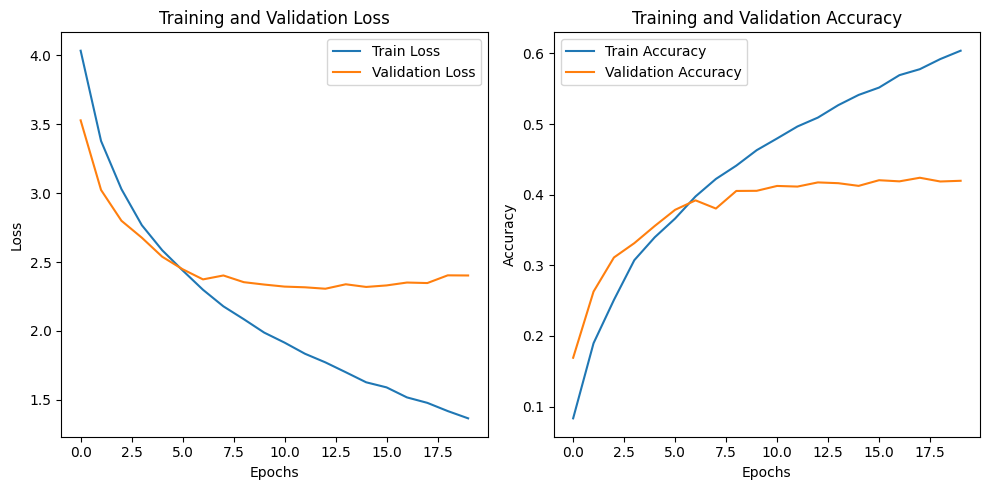

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## b) Loss & Accuracy vs Train Set Size [2 points]

Generate a plot that shows loss and accuracy for training and test sets as a function of the number of instances in the training set. For this part, you will be modifying your training set. For instance, you can run 10 experiments where you first use a random 10% of the training data, a second experiment where you use a random 20% of the training data, and so on until you use the entire training set. Keep the network hyperparameters constant during your experiments.

In [28]:
# your code here
training_loss = []
training_accuracy = []
testing_loss = []
testing_accuracy = []
num_epochs = 7
total_train_size = len(X_train)

for fraction in range(1, 11):  # input size as fraction of original training set: 10% to 100% in steps of 10%
    fraction_size = int(fraction / 10 * total_train_size)
    print(f"Training on {fraction_size} samples ({fraction * 10}%)")
    X_train_fraction = X_train[:fraction_size]
    y_train_fraction = y_train_original[:fraction_size]
    
    
    model = build_cnn(input_shape, num_classes)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])
    
    #Train the model on the fraction of the input size
    history = model.fit(X_train_fraction, y_train_fraction, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test_original), verbose=0)
    
    # Store the loss and accuracy for the training and test sets
    training_loss.append(history.history["loss"][-1])
    training_accuracy.append(history.history["accuracy"][-1])
    testing_loss.append(history.history["val_loss"][-1])
    testing_accuracy.append(history.history["val_accuracy"][-1])



## c) Analysis [1 point]
After 7 epochs there is almost no positive change in the accuracy and loss for the testing set which means the function could only overfit to the training set from there. I only ran it for 20 ephochs but it seems like the loss is increasing after 17 epochs.

# 2. Multi-layer Perceptrons [6 points]

## a) Implementation [3 points]

Implement a feedforward neural network by hand using only Python and **basic NumPy functions** for the task of binary classification. The network should have a two-dimensional input, one hidden layer, and use a nonlinear activation function. Mean Squared Error should be used as the cost function and all weights should be randomly initialized.

Your activation function and its derivative should be hardcoded and included below, e.g.:


``` python
def activation(x):
    return x^2

def activation_derivative(x):
    return 2*x
```

feel free to use lambda functions instead if you want.

In [106]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_der(x):
    return 1 - tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def relu_der(x):
    return (x > 0).astype(float)

class mlp():
    def __init__(self, lr, num_in, num_hidden, num_out):
        self.lr = lr
        self.num_hidden = num_hidden
        self.weights_in = np.random.random_sample((num_in, self.num_hidden))
        self.weights_out = np.random.random_sample((self.num_hidden, num_out))


    def activation(self, x):
        return sigmoid(x)


    def act_der(self, x):
        return sigmoid_der(x)


    def train(self, X, t):
        # you code the forward pass
        # i've used Roger Grosse's notation here
        z = np.dot(X, self.weights_in)
        h = self.activation(z)
        y = np.dot(h, self.weights_out)
        predictions = self.activation(y)

        # error
        cost = predictions - t
        error = np.mean(np.square(cost)) / 2

        # backprop output layer gradients
        delta_out = self.act_der(y)
        dcost_dout = cost * delta_out
        dcost_weights_out = np.dot(h.T, dcost_dout)

        # backprop hidden layer gradients
        dcost_dah = np.dot(dcost_dout, self.weights_out.T)
        din_dhidden = self.act_der(z)
        dcost_weights_hidden = np.dot(X.T, din_dhidden * dcost_dah)

        # you update weights (this is where you use the learning rate)
        self.weights_in = self.weights_in - (self.lr * dcost_weights_hidden)
        self.weights_out = self.weights_out - (self.lr * dcost_weights_out)

        return error
    
    def accuracy(self, X, t):
        predictions = self.predict(X)
        predicted_labels = (predictions > 0.5).astype(int)
        correct_predictions = np.sum(predicted_labels == t)
        accuracy = correct_predictions / len(t) * 100
        return accuracy


    def predict(self, X):
        hidden_in = np.dot(X, self.weights_in)
        hidden_act = self.activation(hidden_in)
        out_in = np.dot(hidden_act, self.weights_out)

        return self.activation(out_in)
    


## b) Training [1 point]
Train the model on the dataset below. Plot your error and your model's predictions.

> Note: Training this model may take far more epochs than previous models you may have worked with. On the order of hundreds of thousands.

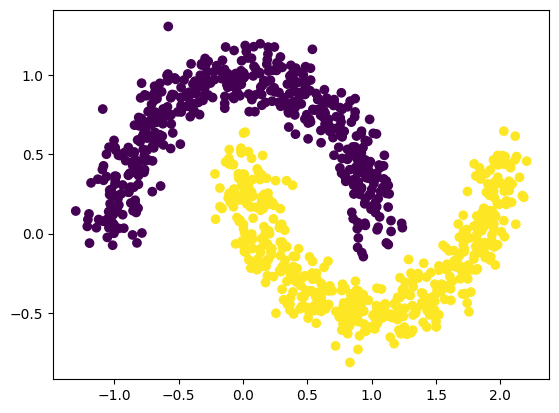

In [107]:
from sklearn import datasets
import matplotlib.pyplot as plt

# generate data
features, labels = datasets.make_moons(1000, noise=0.1, random_state=1)
labels = labels.reshape(1000, 1)

# plot dataset
plt.figure()
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.show()

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True)




# create and train your model here
network = mlp(lr=0.01, num_in=2, num_hidden=15, num_out=1)
epochs = 100000
errors = []
accuracies = []
for epoch in range(epochs):
    error = network.train(X_train, y_train)
    accuracy = network.accuracy(X_train, y_train)
    accuracies.append(accuracy)
    errors.append(error)
    if epoch % 10000 == 0:
        print(f"Epoch {epoch}, Error: {error}, Accuracy: {accuracy}%")

Epoch 0, Error: 0.23850930064165937, Accuracy: 49.625%
Epoch 10000, Error: 0.013075546864142664, Accuracy: 97.0%
Epoch 20000, Error: 0.011971169389500234, Accuracy: 97.0%
Epoch 30000, Error: 0.011581121991234677, Accuracy: 96.875%
Epoch 40000, Error: 0.011344541299877853, Accuracy: 96.875%
Epoch 50000, Error: 0.011040499327140147, Accuracy: 97.25%
Epoch 60000, Error: 0.009923495854623855, Accuracy: 97.625%
Epoch 70000, Error: 0.00912962853889398, Accuracy: 98.125%
Epoch 80000, Error: 0.008607740813469857, Accuracy: 98.25%
Epoch 90000, Error: 0.008264355711538232, Accuracy: 98.5%


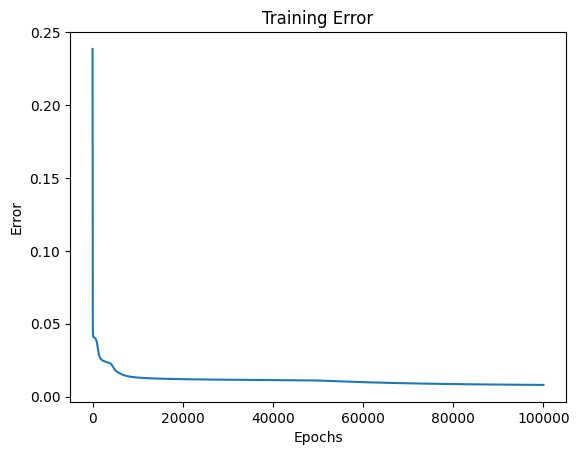

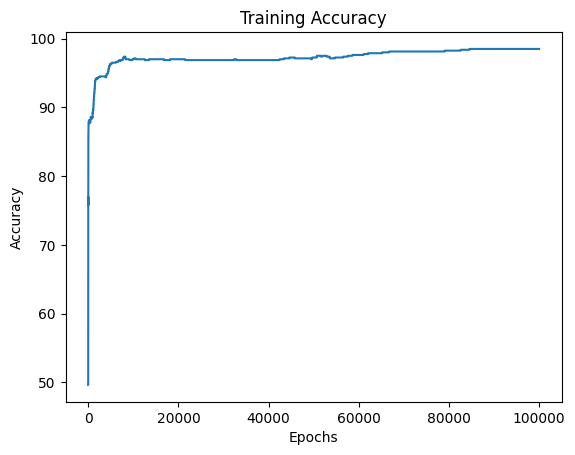

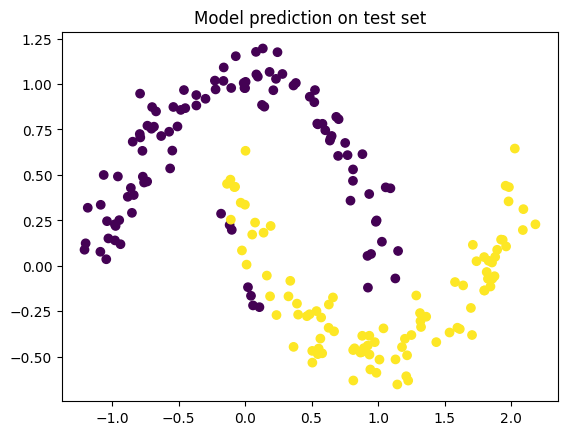

In [120]:


# plot your predictions on the test set here

plt.figure()
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Training Error")
plt.show()

plt.figure()
plt.plot(range(epochs), accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.show()

predictions = network.predict(X_test)
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions.ravel() > 0.5)
plt.title("Model prediction on test set")
plt.show()

### OPTIONAL / FOR FUN

With a classification task like this it can be helpful to visualize the decision boundaries that your model learns. I found [this stackoverflow post](https://stackoverflow.com/questions/32921268/multilayer-perceptron-visualizing-decision-boundaries-2d-in-python) detailing how to plot the decision boundary of your model, and adapted it so that it *should* work with your model, though you may need to tweak the model name (`network`) if you've used something different.

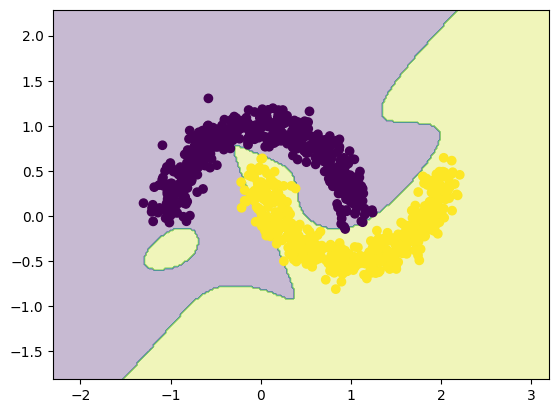

In [121]:
h = .02  # step size in the mesh
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = network.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.round(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(features[:, 0], features[:, 1], c=labels)
plt.show()

## c) Findings [2 points]
 Report on your findings, such as what values did you end up using for your hyperparameters, why did you choose those values, what was the final accuracy of your model, and anything else you think might be of interest.

Discussion Here:
I started by keeping all other parameters the same and changed the learning rate:
I started with learning rate = 0.1 and reached a minimum error of around 0.026 and a maximum accuracy of 96.125%.
I decreased the learning rate to 0.01 as the plot was very bumpy and the jumps in the gradient descents were likely too big. In this case the error function became smooth and the minimum error became around 0.0127 and the max accuracy became 97.25%.
i further decreased the learning rate to 0.001 and at this point the jumps in the gradient descent became to small that the minimum error for the same number of epochs (100000) became 0.226 and 94.625% for max accuracy.
So I finally fixed the learning rate to 0.01

Then I changed the activation function to Tanh with the same number of epochs (100000) and the learning rate of 0.01
The accuracy significantly decreased to 86.625% (I tried it with different epochs and with 0.001 I got that max accuracy) so I tried relu instead, which further decreased the max accuracy to 84.5%. So I chose Sigmoid as its max accuracy was 97.375%.

Then I changed the number of epochs with sigmoid activation function and the learning rate of 0.01: In this case the accuracy did not increase beyond 97.375 and stayed constant. So I kept it to 100000 for max efficiency.

For all experiments above the number of neurons in the hidden layer was 5. I increased it to 10 and the max accuracy increased to 97.5%, then I increased it to 15 and it increased further to 98.75%. When I increased it further to 97.25% the accuracy went down to 97.25%.

For the reasons above, from my experiments I chose epochs = 100000 number of hidden layer neurons = 15 activation = sigmoid and learning rate = 0.01 and reached a max of 98.75%.

I chose these values experimentally and stopped increasing/decreasing them further when the model's accuracy started to go down significantly.
